In [9]:
%matplotlib inline
# !pip install cv2
!pip install opencv-contrib-python
!pip install opencv-python

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
dir ="C:\\Users\\Surya Teja\\Desktop\\petImage"

In [3]:
categories = ['cat', 'dog']

data = []

for category in categories:
    path = os.path.join(dir, category)
    label = categories.index(category)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        pet_img = cv2.imread(imgpath,0)
        try:
            pet_img = cv2.resize(pet_img,(50,50))
# making image single array
            image = np.array(pet_img).flatten()
            data.append([image,label])
        except Exception as e:
            pass

print(len(data))        




2001


accuracy:  1.0
Prediction is  :  cat


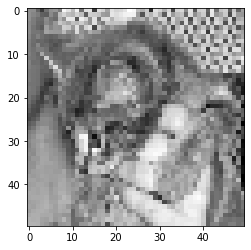

In [30]:
# to read the file
pick_in = open("C:\\Users\\Surya Teja\\Desktop\\data1.pickle",'rb')
data = pickle.load(pick_in)
pick_in.close()


random.shuffle(data)
features = []
labels = []

for feature,label in data:
    features.append(feature)
    labels.append(label)
    
x_train, x_test, y_train,y_test = train_test_split(features, labels, test_size = 0.25)

model = SVC(C=1, kernel='poly', gamma ='auto')
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
y_pred
accuracy = accuracy_score(y_test,y_test)

categories =['cat', 'dog']

print("accuracy: ", accuracy)

print('Prediction is  : ',categories[y_pred[100]] )

mypet = x_test[50].reshape(50,50)
plt.imshow(mypet,cmap='gray')
plt.show()

In [31]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.63      0.54      0.58       276
           1       0.52      0.61      0.56       225

    accuracy                           0.57       501
   macro avg       0.58      0.58      0.57       501
weighted avg       0.58      0.57      0.58       501



In [32]:
# for writing a file
# pick = open('medal.sav','wb')
# pickle.dump(model,pick)
# pick.close()

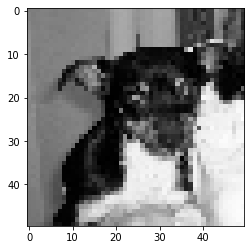

In [33]:
# pick = open('medal.sav','rb')
# model = pickle.load(pick)
# pick.close()

# y_pred = model.predict(x_test)
# accuracy = model.score(x_test,y_test)

# categories =['cat', 'dog']

# print("accuracy: ", accuracy)

# print('Prediction is  : ',categories[y_pred[5]] )

mypet = x_test[5].reshape(50,50)
plt.imshow(mypet,cmap='gray')
plt.show()

## Now presenting data with random classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [35]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.68      0.51      0.59       315
           1       0.42      0.60      0.49       186

    accuracy                           0.54       501
   macro avg       0.55      0.56      0.54       501
weighted avg       0.59      0.54      0.55       501

